### Задание 2. Вариант 3.
Найти байесовскую оценку параметра $\theta$ относительно MSE. Семейство распределений для выборки: $Exp(\theta)$. Априорное распределение параметра $\Gamma(k, \lambda)$

$X|\theta \sim Exp(\theta) \Rightarrow f(x|\theta)=\theta e^{-\theta x}$

Тогда можем написать функцию правдоподобия: $$L(\theta|X)=\prod_{i=1}^{i=n}f(x_i|\theta)=\prod_{i=1}^{i=n}\theta e^{-\theta x_i} = \theta^ne^{-\theta\sum_{i=1}^{i=n}x_i}$$

Априорное распределение: $$\theta \sim \Gamma(k,\lambda) \Rightarrow \pi(\theta)=\frac{\lambda^k\theta^{k-1}e^{-\lambda\theta}}{\Gamma(k)} = \frac{\lambda^k\theta^{k-1}e^{-\lambda\theta}}{(k-1)!}$$Так как по условию k - натуральное.

Вспомним теорему Байеса: $$P(A|B)=\frac{P(B|A)P(A)}{P(B)} \quad \Rightarrow \quad \pi(\theta|x)=\frac{L(\theta|X)\cdot\pi(\theta)}{\int\limits_{0}^{\infty}L(\theta|X)\pi(\theta)d\theta}$$

Посчитаем числитель: $$\Large L(\theta|X)\cdot\pi(\theta)=\theta^ne^{-\theta\sum_{i=1}^{i=n}x_i}\cdot\frac{\lambda^k\theta^{k-1}e^{-\lambda\theta}}{(k-1)!}=\frac{\lambda^k\theta^{(n+k-1)}e^{-\theta(\lambda+\sum_{i=1}^{i=n}x_i)}}{(k-1)!}$$

Посчитаем знаменатель: $$\int\limits_{0}^{\infty}L(\theta|X)\pi(\theta)d\theta = \int\limits_{0}^{\infty}\frac{\lambda^k}{\Gamma(k)}\cdot\theta^{(n+k-1)}\cdot e^{-\theta(\sum x_i + \lambda)}d\theta\stackrel{\star}{=}$$ $$\boxed{\Gamma(n+k)=\int\limits_0^{\infty}\theta^{(n+k-1)}e^{-\theta}d\theta \quad и\quad \int\limits_0^\infty\theta^{\alpha-1}e^{-\beta\theta}d\theta = \frac{\Gamma(\alpha)}{\beta^\alpha}}$$
Первое равенство - формула гамма-функции. Второе равенство выводится из формулы гамма-функции и замены переменных $t \rightarrow \beta\theta$ $$\stackrel{\star}{=}\frac{\lambda^k}{\Gamma(k)}\cdot\int\limits_{0}^{\infty}\theta^{(n+k-1)}\cdot e^{-\theta(\sum x_i + \lambda)}d\theta = \frac{\Gamma(n+k)}{(\lambda+\sum x_i)^{(n+k)}}$$

Теперь можно с чистой совестью считать результат: $$\boxed{\boxed{\pi(\theta|X) = \frac{(\sum x_i + \lambda)^{(n+k)}}{\Gamma(n+k)}\cdot\theta^{(n + k - 1)}e^{-(\sum x_i + \lambda)\theta}}}$$

Скажем, что $a = n + k \quad b = (\sum x_i + \lambda)$

Тогда $$\boxed{\boxed{\pi(\theta|X) = \frac{b^a}{\Gamma(a)}\theta^{a-1}e^{-b\theta}= \Gamma(a, b)}} \Rightarrow \boxed{\boxed{\theta|X \sim \Gamma(a, b)}}$$

Отсюда уже можно найти байесовскую оценку $\pi(\theta|X)$ относительно квадратичной функции потерь. Байесовская оценка относительно квадратичной функции потерь - это математическое ожидание найденного распределения:

$\~\theta_B = E(\theta|X)$

Поскольку распределение $\theta|X \sim \Gamma(a, b)$, используем свойство гамма-распределения:

$$E(\theta|X) = \frac{a}{b} = \frac{n+k}{\sum x_i + \lambda} = \frac{n+k}{n\overline x + \lambda}$$

***
#### Эксперимент

В нашем эксперименте $k=1, \lambda=1 \Rightarrow \~\theta_B=\frac{n+1}{n\overline x + 1}$ 

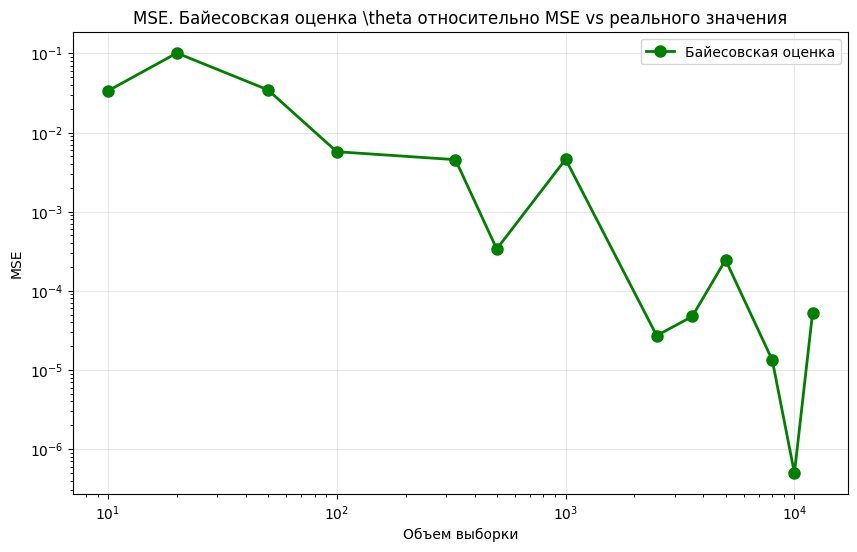

,n,Theta,MSE,Большие ошибки (> 5%),Смещение
0,10,0.441821,3.361532e-02,87.03%,0.069981
1,20,1.416658,1.009940e-01,81.10%,0.036109
2,50,1.303122,3.458486e-02,71.81%,0.016965
3,100,0.738926,5.720314e-03,61.35%,0.009021
4,330,1.214412,4.538315e-03,36.38%,0.002529
5,500,0.409028,3.375382e-04,26.14%,0.001303
6,1000,2.148389,4.598642e-03,11.22%,-0.000543
7,2500,0.260461,2.717295e-05,1.24%,0.000180
8,3575,0.410164,4.738512e-05,0.29%,0.000201
9,5000,1.104867,2.458587e-04,0.04%,0.000216


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n = np.array([10, 20, 50, 100, 330, 500, 1000, 2500, 3575, 5000, 8000, 10000, 12000])  # объём выборок
size = 100000 # количество генерируемых выборок для каждого n_i
error_param = 0.05
lambda_param = 1
k_param = 1

thetas = []
mse_bayes = []
large_error_bayes = []
bias_bayes = []
theta_bayes = np.zeros(size)

for n_i in n:
    my_theta = np.random.gamma(1, scale=k_param, size=lambda_param)[0]
    thetas.append(my_theta)
    for j in range(size):
        x = np.random.exponential(scale=1/my_theta, size=n_i)
        theta_bayes[j] = (n_i + k_param) / (x.sum() + lambda_param) #наша формула
    mse_bayes.append(np.mean((theta_bayes - my_theta)**2))
    large_error_bayes.append(np.mean(np.abs(theta_bayes - my_theta) > my_theta * error_param))
    bias_bayes.append(np.mean(theta_bayes - my_theta))


plt.figure(figsize=(10, 6))
plt.plot(n, mse_bayes, 'o-', linewidth=2, markersize=8, label='Байесовская оценка', color='green')
plt.xlabel('Объем выборки')
plt.ylabel('MSE')
plt.title('MSE. Байесовская оценка \\theta относительно MSE vs реального значения')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

df_results = pd.DataFrame({
    'n': n,
    'Theta': thetas,
    'MSE': mse_bayes,
    'Большие ошибки (> 5%)': [f"{v*100:.2f}%" for v in large_error_bayes],
    'Смещение': bias_bayes
})
display(df_results)
